# Environment Setup

In [3]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)


Mounted at /content/drive/


In [29]:
root_directory = "drive/MyDrive/ML/dataset"

In [5]:
filename_zip = "A_Z_Handwritten_Data.zip" 

In [6]:
!ls drive/MyDrive/ML/dataset/

A_Z_Handwritten_Data.csv  A_Z_Handwritten_Data.zip  Input  Output  saved_models


In [7]:
# set path for your zip file and
# destination path after unzipping your file.
filepath = f"{root_directory}/{filename_zip}"

destination = f"{root_directory}/"


In [8]:
# unzip the zip file
!unzip {filepath} -d {destination}


Archive:  drive/MyDrive/ML/dataset/A_Z_Handwritten_Data.zip
replace drive/MyDrive/ML/dataset/A_Z_Handwritten_Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: drive/MyDrive/ML/dataset/A_Z_Handwritten_Data.csv  


In [9]:
filename_unzipped = "A_Z_Handwritten_Data.csv"

dataset = f"{root_directory}/{filename_unzipped}"

In [10]:
input_plots_path = f"{root_directory}/Input"
output_plots_path = f"{root_directory}/Output"
saved_models_path = f"{root_directory}/saved_models"

# Packages Import

In [11]:
import numpy
import pandas
import matplotlib.pyplot as plot
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
# from keras.optimizers import SGD, Adam
# from keras.optimizers import SGD

from keras.optimizers import gradient_descent_v2 as SGD

from keras import optimizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils.np_utils import to_categorical


# Data Preprocessing (Read Dataset)
- We use pandas to read our dataset and hence return a dataframe.

In [12]:
df = pandas.read_csv(f'{dataset}')
df = df.astype('float32')

df = pandas.DataFrame(df)

df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Know Your Data

In [13]:

print(f"Dataframe shape is: \n")

df.shape


Dataframe shape is: 



(372450, 785)

In [14]:
 
print(f"Dataframe Info is: \n")

df.info()

Dataframe Info is: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372450 entries, 0 to 372449
Columns: 785 entries, 0 to 0.648
dtypes: float32(785)
memory usage: 1.1 GB


In [15]:

print(f"Dataframe Description: \n\n")
df.describe()


Dataframe Description: 




,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


In [16]:

print(f"Null Values Count: \n\n")

df.isnull().sum()

Null Values Count: 




0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

# Data Preparation and Manipulation

In [17]:
# Split the dataset into two splits.
# Obviously, X and Y

x = df.drop('0', axis = 1)
y = df['0']



## Fine Tuning Our Dataset

In [18]:
# Reshaping our dataset to get the best dataset our model can understand.
# To fine tune by reshaping helps us to convert our data into imagery format.
# we are going to split our dataset into two parts(X, Y). However, each dataset needs  to be 
# split further into two parts(x = training data and y-Testing data)

x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x, y, test_size = 0.2)
x_train_split = numpy.reshape(x_train_split.values, (x_train_split.shape[0], int(28.0178515), int(28.0178515)))

x_test_split = numpy.reshape(x_test_split.values, (x_test_split.shape[0], int(28.0178515), int(28.0178515)))

print('Our training data split new shape after reshape is:', x_train_split.shape)
print('Our test data split new shape after reshape is:', x_test_split.shape)

Our training data split new shape after reshape is: (297960, 28, 28)
Our test data split new shape after reshape is: (74490, 28, 28)


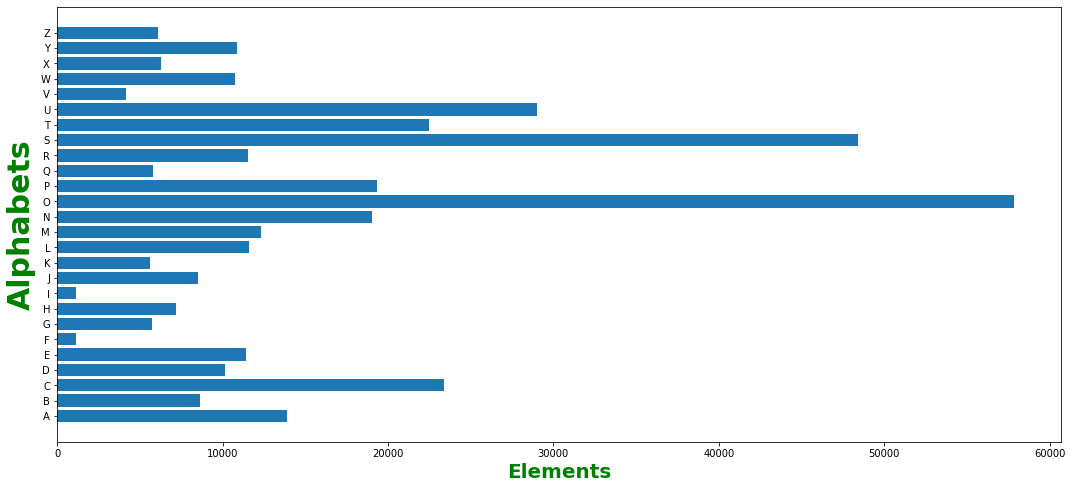

In [19]:
# Create dictionary to hold on the alphabet characters. We shall use this to help us revamp 
# the dataframe character's keys. Why? this is because, characters in the file(dataframe) are 
# using floating values as keys.

alphabet_dictionary = {
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
    7:'H',
    8:'I',
    9:'J',
    10:'K',
    11:'L',
    12:'M',
    13:'N',
    14:'O',
    15:'P',
    16:'Q',
    17:'R',
    18:'S',
    19:'T',
    20:'U',
    21:'V',
    22:'W',
    23:'X', 
    24:'Y',
    25:'Z'
}

# Visualize Alphabet distribution in the dataset maping our alphabet dictionary
# above

y_integer = numpy.int0(y) # Pass Y series as our data to plot our sketch against the alphabets distribution.
alphabet_count = numpy.zeros(26, dtype = 'int')

for i in y_integer:
    alphabet_count[i] += 1
    
alphabets = []

for i in alphabet_dictionary.values():
    alphabets.append(i)
    
fig, ax = plot.subplots(1, 1, figsize = (18, 8))
ax.barh(alphabets, alphabet_count)

plot.xlabel('Elements', fontsize = 20, fontweight = 'bold', color = 'green')
plot.ylabel('Alphabets', fontsize = 30, fontweight = 'bold', color = 'green')
plot.plot() 

plot.savefig(f"{input_plots_path}/AlphabetMappingVisualization.png")
plot.show()


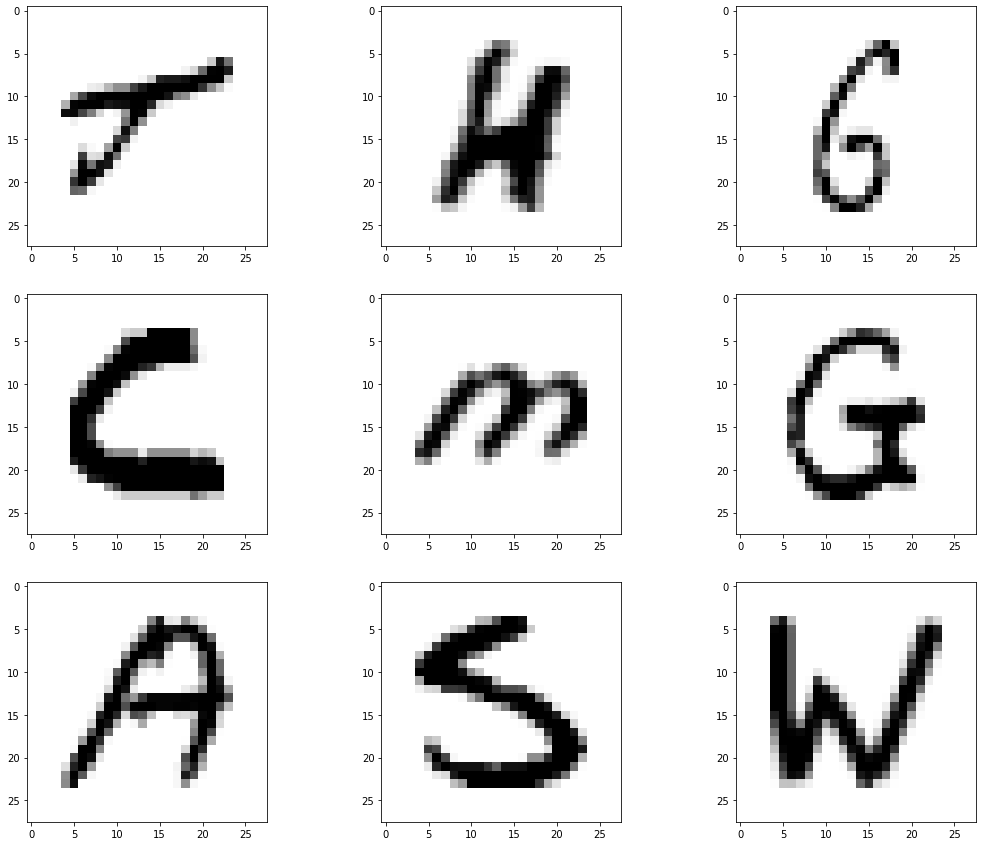

In [20]:
# Shuffling Our Images from the dataset.
# This helps in model optimization. It is one method of Optimizing a model.

shuffles = shuffle(x_train_split[:100])

fig, ax = plot.subplots(3, 3, figsize = (18, 15))
axes = ax.flatten()

for i in range(9):
    shuffle = cv2.threshold(shuffles[i], 30, 200, cv2.THRESH_BINARY)

    axes[i].imshow(numpy.reshape(shuffles[i], (28, 28)), cmap = 'Greys')

plot.savefig(f"{output_plots_path}/DatasetShufflingVisualization.png")
plot.show()


In [21]:
# we are going to do a Reshaping Our dataset. training and test split 
# should be reshaped to make it perfect for the model to understand in the best way possible.
# Remember our current shape of our data is:
# train data: (297960, 28, 28, 1)
# test data: (74490, 28, 28, 1)

# SO:
x_train_split = x_train_split.reshape(x_train_split.shape[0], x_train_split.shape[1], x_train_split.shape[2], 1)
print("New Shape of our x training data split after reshape is: ", x_train_split.shape)

x_test_split = x_test_split.reshape(x_test_split.shape[0], x_test_split.shape[1], x_test_split.shape[2], 1)
print("New shape of our x testing data split after reshape is: ", x_test_split.shape)


# Last but not list, doing final tuning on our y train dataset split by 
# changing float values in our dataset to categorical values.
# Converts a class vector (integers) to binary class matrix.
y_train_split = to_categorical(y_train_split, num_classes = 26, dtype = 'int')
print("New Shape of our y training data split after float value - categorical values conversion is: ", y_train_split.shape)

y_test_split = to_categorical(y_test_split, num_classes = 26, dtype = 'int')
print("New shape of our y testing data split after float value - categorical values conversion is: ", y_test_split.shape)


New Shape of our x training data split after reshape is:  (297960, 28, 28, 1)
New shape of our x testing data split after reshape is:  (74490, 28, 28, 1)
New Shape of our y training data split after float value - categorical values conversion is:  (297960, 26)
New shape of our y testing data split after float value - categorical values conversion is:  (74490, 26)


# MODELLING

## Our Model

In [22]:
# Model Setup:
sequential_model = Sequential()

model_layers_array = [
                      Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
                      MaxPool2D(pool_size = (2, 2), strides = 2),
                      Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
                      MaxPool2D(pool_size = (2, 2), strides = 2),
                      Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', padding = 'valid'),
                      MaxPool2D(pool_size = (2, 2), strides = 2),
                      Flatten(),
                      Dense(64, activation = "relu"),
                      Dense(128, activation = "relu"),
                      Dense(26, activation = "softmax")
                  ]

for layer in model_layers_array:
  sequential_model.add(layer)


In [23]:
# Model Compiling
# we compile our model using a compile() function method.
sequential_model.compile(
    optimizer = 'adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

In [24]:
# Training Our model using fit() function method
history = sequential_model.fit(x_train_split, y_train_split, epochs = 10, validation_data = (x_test_split, y_test_split))


Epoch 1/10
9312/9312 [==============================] - 398s 43ms/step - loss: 0.1608 - accuracy: 0.9570 - val_loss: 0.0811 - val_accuracy: 0.9771
Epoch 2/10
9312/9312 [==============================] - 404s 43ms/step - loss: 0.0730 - accuracy: 0.9800 - val_loss: 0.0680 - val_accuracy: 0.9822
Epoch 3/10
9312/9312 [==============================] - 400s 43ms/step - loss: 0.0612 - accuracy: 0.9833 - val_loss: 0.0615 - val_accuracy: 0.9851
Epoch 4/10
9312/9312 [==============================] - 407s 44ms/step - loss: 0.0563 - accuracy: 0.9849 - val_loss: 0.0635 - val_accuracy: 0.9834
Epoch 5/10
9312/9312 [==============================] - 414s 44ms/step - loss: 0.0527 - accuracy: 0.9860 - val_loss: 0.0614 - val_accuracy: 0.9854
Epoch 6/10
9312/9312 [==============================] - 426s 46ms/step - loss: 0.0510 - accuracy: 0.9864 - val_loss: 0.0758 - val_accuracy: 0.9837
Epoch 7/10
9312/9312 [==============================] - 418s 45ms/step - loss: 0.0506 - accuracy: 0.9872 - val_loss: 0

In [25]:

sequential_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [26]:

# You can as well have a script if a same model exists create a different version 
# save as a new version. Meanwhile, Our model should be saved in this stage. 
sequential_model.save(f"{saved_models_path}/text_character_recognition_model.h5")


# Model Accuracy and Loss Lookout (Training and Validation)

In [27]:
# There several ways of how to increase/improve performance in terms of accuracy
# We shall discuss them in the documentation for that matter.

# The printing of the accuracy and loss below is shown in how epochs were 
# run respectively.

count = 0
print("Model Validation accuracy values: \n")
for acuracy_value in history.history['val_accuracy']:
  count += 1
  print(f"{count}: ", acuracy_value)

print("\n\n")

count = 0
print("Model Training accuracy values: \n")
for acuracy_value in history.history['accuracy']:
  count += 1
  print(f"{count}: ", acuracy_value)

print("\n\n")

count = 0
print("Model Validation loss values: \n")
for loss in history.history['val_loss']:
  count += 1
  print(f"{count}: ", loss)

print("\n\n")

count = 0
print("Model Training loss values: \n")
for loss in history.history['loss']:
  count += 1
  print(f"{count}: ", loss)  


Model Validation accuracy values: 

1:  0.9771378636360168
2:  0.9821855425834656
3:  0.9850584268569946
4:  0.9833534955978394
5:  0.9853671789169312
6:  0.9837159514427185
7:  0.9834071397781372
8:  0.9857162237167358
9:  0.9881191849708557
10:  0.9833534955978394



Model Training accuracy values: 

1:  0.9569539427757263
2:  0.9799603819847107
3:  0.983272910118103
4:  0.9848805069923401
5:  0.9859645366668701
6:  0.9864310622215271
7:  0.9871694445610046
8:  0.9877164959907532
9:  0.9878775477409363
10:  0.9881125092506409



Model Validation loss values: 

1:  0.0810558870434761
2:  0.06799600273370743
3:  0.06150934472680092
4:  0.06346261501312256
5:  0.06135787069797516
6:  0.07583218067884445
7:  0.07175902277231216
8:  0.05861283093690872
9:  0.05279875174164772
10:  0.07759948819875717



Model Training loss values: 

1:  0.16083987057209015
2:  0.07298122346401215
3:  0.06120156869292259
4:  0.05634519085288048
5:  0.05268457904458046
6:  0.05095662921667099
7:  0.05062656

# PREDICTION PHASE

In [53]:
pred = sequential_model.predict([x_test_split]) 
print(pred)

[[2.0575628e-18 1.4401040e-07 3.4458194e-06 ... 4.3624835e-12
  4.8810463e-08 6.2637200e-06]
 [2.4428491e-16 2.5698856e-18 5.9128192e-22 ... 0.0000000e+00
  5.9431286e-27 1.9469779e-31]
 [9.9999392e-01 4.5016879e-13 3.2622057e-18 ... 2.7826641e-22
  7.0643592e-34 2.5064075e-17]
 ...
 [0.0000000e+00 3.6594029e-27 2.8607697e-29 ... 0.0000000e+00
  3.4236179e-37 1.0053996e-25]
 [8.0252490e-28 1.8572390e-22 9.9980134e-01 ... 0.0000000e+00
  1.6785512e-18 1.2745775e-07]
 [1.4519195e-23 7.0777488e-13 2.0019084e-12 ... 0.0000000e+00
  1.2063624e-17 0.0000000e+00]]


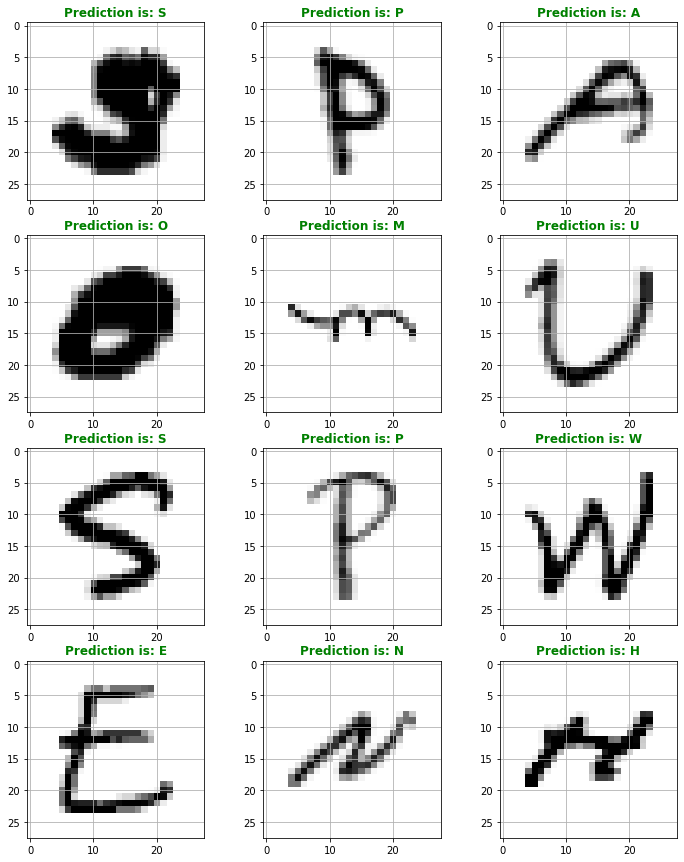

In [61]:

# To use prediction made, we are going to plot show the letters in an image
# formart. Thn we are going to compare the x test split images against the prediction. 

fig, axes = plot.subplots(4, 3, figsize = (12, 15))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = numpy.reshape(x_test_split[i], (28, 28))
    # print(img)
    ax.imshow(img, cmap = 'Greys') 

    prediction = alphabet_dictionary[numpy.argmax(pred[i])]
    # print(prediction)
    ax.set_title("Prediction is: " + prediction, fontsize = 12, fontweight = 'bold', color = 'green')
    ax.grid()
plot.savefig(f"{output_plots_path}/Text_Characters_Prediction_With_Our_Saved_Model.png") 



#                                                                      **END**


Our Model is perfectly crafted and accurate with final accuracy value of, 0.9881125092506409 and final validation value of, 0.07759948819875717.